In [2]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PyPDF2 import PdfReader
from readability import Readability
from wordcloud import WordCloud, STOPWORDS 

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In the two articles, it is being expressed that Claudine Gay, the president of Harvard University, has been charged with plagiarism in some of her academic writings and has been called to resign from her role as president of Harvard University due to her congressional testimony about antisemitism on campus. 
Both articles, based on the language used, seem to be objective, nevertheless, Claudine Gay is thrown, to an extent, in a negative light. 

In [4]:
reader = PdfReader("C:/Users/Nhyira/Desktop/MSBA/Sem2/Adv. Programming/Learning/AdvProgrammingClass/Assignments/foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
text = ""
last_word = "Video"

for page in reader.pages[0:-2]:
    text += page.extract_text()


final_page =  reader.pages[-2]
fp_text = final_page.extract_text()
stop =fp_text.index(last_word) 

text += fp_text[:stop]

print(text)

#Logic and methods aided by PyPDF2 docs,stack overflow, ChatGPT and Google

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [5]:
reader2 = PdfReader("C:/Users/Nhyira/Desktop/MSBA/Sem2/Adv. Programming/Learning/AdvProgrammingClass/Assignments/reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")
text2 = ""

for page in reader2.pages[0:-1]:
    text2 += page.extract_text()

print(text2)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

Page numbers are showing in the text without spaces seperating them from the next word. Also, there are spaces between some words, for instance, Office has been extracted as Of fice. 

In [6]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(text)

{'neg': 0.071, 'neu': 0.856, 'pos': 0.073, 'compound': 0.4545}

In [7]:
sid2 = SentimentIntensityAnalyzer()
sid2.polarity_scores(text2)

{'neg': 0.067, 'neu': 0.919, 'pos': 0.014, 'compound': -0.9655}

The sentiment analysis for both articles highlights that both articles are predominantly neutral. However, the first article has higher positive sentiment score than negative, while the second article has higher negative sentiment score than positive. 

In [8]:
head = text[16:100].replace("\n", " ")
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(head)

{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}

In [9]:
head2 = text2[21:98].replace("\n", " ")
sid2 = SentimentIntensityAnalyzer()
sid2.polarity_scores(head2)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Based on the headlines, the second article is completely neutral while the first article is mostly neutral with some negative sentiments.
These results don't agree with the sentiment analysis of the entire articles.

The first chosen metric is the Automated Readability Index (ARI). It makes use of the average number of characters per word (AWL) and the average number of words per sentence (ASL) to calculate a score that indicates how easy or difficult a text is. That score correlates to a specific grade level indicating which grade level the text is readable by.

In [10]:
r = Readability(text)
ari = r.ari()

print(ari.score)
print(ari.grade_levels)
#Aided by py-readability-metrics docs

23.33832431335408
['college_graduate']


In [11]:
r = Readability(text2)
ari2 = r.ari()

print(ari2.score)
print(ari2.grade_levels)

22.550086820628586
['college_graduate']


The second chosen metric is Spache. It makes use of the Spache Word List which is a set of specific words that 3rd grade readers often find familiar; the word list progresses from basic words to more complex ones. It makes use of unfamiliar words and average sentence length to calculate a score that indicates how easy or difficult a text is. 

In [12]:
r = Readability(text)

s = r.spache()

print(s.score)
print(s.grade_level)

11.47633216073603
11


In [13]:
r = Readability(text2)

s = r.spache()

print(s.score)
print(s.grade_level)

10.20592290328182
10


The first article has readability scores for grade level of college graduate and grade 11 respectively, while the second article has readability scores for grade level of college graduate and grade 10 respectively. It seems the first article is slightly more complex.

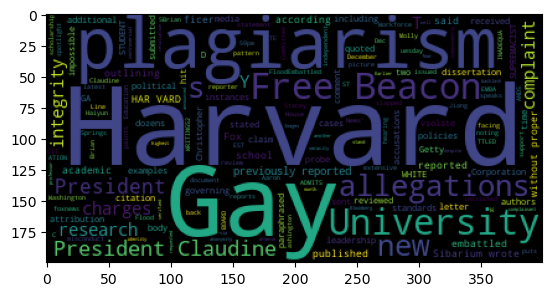

In [14]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(cloud);

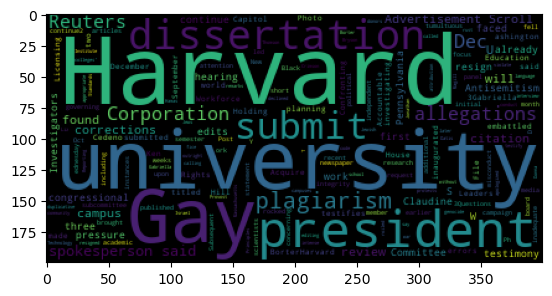

In [15]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text2)
plt.imshow(cloud);

Harvad, Gay, plagiarism, university and president are the most prevalent words across both articles.
Those words give insight into their context.